In [82]:
#import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
home_page = pd.read_csv('home_page_table.csv')
payment_confirmation = pd.read_csv('payment_confirmation_table.csv')
payment_page = pd.read_csv('payment_page_table.csv')
search_page = pd.read_csv('search_page_table.csv')
user = pd.read_csv('user_table.csv')

In [26]:
if len(user.user_id.unique()) == len(user):
    print('The userid is unique and it only has one for each in the table')
else: print('The userid is not unique and further action would needed')

The userid is unique and it only has one for each in the table


In [39]:
data = pd.merge(left = user, right = home_page, how = 'left', on = 'user_id')
data = pd.merge(left = data, right = search_page, how = 'left', on = 'user_id')
data = pd.merge(left = data, right = payment_page, how = 'left', on = 'user_id')
data = pd.merge(left = data, right = payment_confirmation, how = 'left', on = 'user_id')
data.columns = ['user_id','date','device','sex','home','search','payment','payment_done']
data.head()

,user_id,date,device,sex,home,search,payment,payment_done
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [42]:
print('the total number of people is ',len(data))

the total number of people is  90400


## Funnel Conversion Analysis

In [46]:
data['search'].isna().sum()

45200

In [54]:
first_layer = (len(data)-data['home'].isna().sum())/len(data)
second_layer = (len(data)-data['search'].isna().sum())/len(data)
third_layer = (len(data)-data['payment'].isna().sum())/len(data)
fourth_layer = (len(data)-data['payment_done'].isna().sum())/len(data)

In [63]:
funnel = {'Layers':['first_layer','second_layer','third_layer','fourth_layer'],'Value':[first_layer,second_layer,third_layer,fourth_layer]}
funnel = pd.DataFrame(funnel)
funnel

,Layers,Value
0,first_layer,1.000000
1,second_layer,0.500000
2,third_layer,0.066704
3,fourth_layer,0.005000


### Insights
User are not getting the payment done even when they add the payment into the shopping cart. Typically, payment should be getting done if the user add it into the shopping cart. 

## Graphs

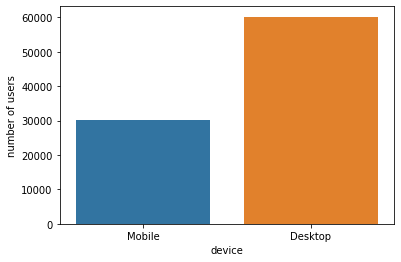

In [83]:
graph1 = data[['user_id','device']].groupby('device').count().reset_index().sort_values(by='device',ascending=False)
graph1_plot = sns.barplot(x='device',y='user_id',data=graph1)
plt.xlabel('device')
plt.ylabel('number of users')
plt.show(graph1_plot)

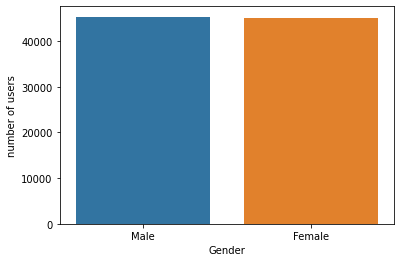

In [84]:
graph2 = data[['user_id','sex']].groupby('sex').count().reset_index().sort_values(by='sex',ascending=False)
graph2_plot = sns.barplot(x='sex',y='user_id',data=graph2)
plt.xlabel('Gender')
plt.ylabel('number of users')
plt.show(graph2_plot)

In [89]:
graph3 = data[['user_id','device','payment','payment_done']].groupby('device').count().reset_index().sort_values(by='device',ascending=False)
graph3

,device,user_id,payment,payment_done
1,Mobile,30200,3020,302
0,Desktop,60200,3010,150


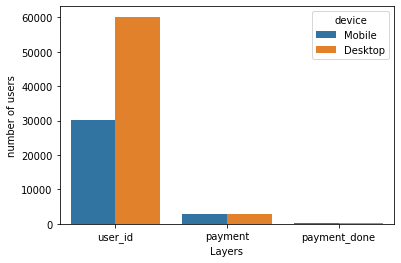

In [90]:
graph3_melt = pd.melt(graph3, id_vars=['device'], value_vars=['user_id','payment','payment_done'])
graph3_plot = sns.barplot(x='variable',y='value',data=graph3_melt,hue='device')
plt.xlabel('Layers')
plt.ylabel('number of users')
plt.show(graph3_plot)

In [92]:
graph4 = data[['user_id','sex','payment','payment_done']].groupby('sex').count().reset_index().sort_values(by='sex',ascending=False)
graph4

,sex,user_id,payment,payment_done
1,Male,45325,2930,211
0,Female,45075,3100,241


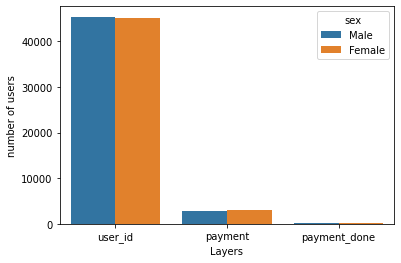

In [94]:
graph4_melt = pd.melt(graph4, id_vars=['sex'], value_vars=['user_id','payment','payment_done'])
graph4_plot = sns.barplot(x='variable',y='value',data=graph4_melt,hue='sex')
plt.xlabel('Layers')
plt.ylabel('number of users')
plt.show(graph4_plot)

In [146]:
data['week'] = pd.to_datetime(data['date'])
data['week'] = data['week'].apply(lambda x: x.isocalendar()[1])
data['weekday'] = pd.to_datetime(data['date']).apply(lambda x: x.isocalendar()[2])

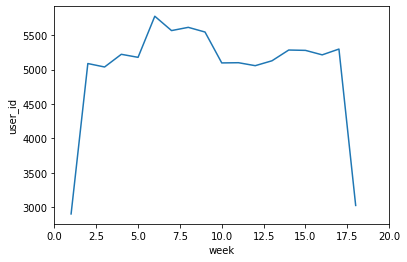

In [162]:
time1 = data[['user_id','week']].groupby('week').count().reset_index()
time1_graph = sns.lineplot(x='week',y='user_id',data= time1)
plt.xlim(0, 20,1)
plt.show(time1_graph)

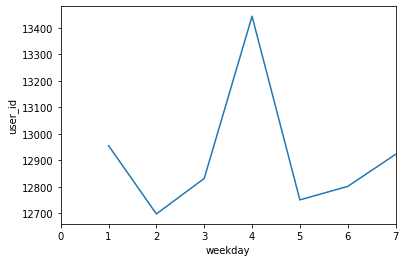

In [165]:
time2 = data[['user_id','weekday']].groupby('weekday').count().reset_index()
time2_graph = sns.lineplot(x='weekday',y='user_id',data= time2)
plt.xlim(0, 7)
plt.show(time2_graph)